In [1]:
import re
import pandas as pd
pdf = pd.read_stata("IAIR7EFL.DTA",convert_categoricals = False)

In [40]:
lst_1 = ['s728a','s728b','s728c','s728d','s728e','s728f','s728g','s731a','s731b','s731c','s731d','s731e','s731f','s731g','s731h','s731i','sb15','s306','s305','v445','sb18s','sb25s','sb29s','sb74','d106','d107','d18']

In [2]:
dict = {
    's731a': 'Frequency takes milk or curd',
    's731b': 'Frequency eats pulses or beans',
    's731c': 'Frequency eats dark green leafy vegetable',
    's731d': 'Frequency eats fruits',
    's731e': 'Frequency eats eggs',
    's731f': 'Frequency eats fish',
    's731g': 'Frequency eats chicken or meat',
    's731h': 'Frequency eats fried food',
    's731i': 'Frequency takes aerated drinks'
}

In [3]:
def binarize(table,var):
    d = {'0' : 'Never',                                 
    '1' : 'Daily',                                
    '2': 'Weekly',                               
    '3' : 'Occasionally'
    }
    global pdf
    global dict
    name = 'Freq eats ' + dict[var].split()[-1] + ' '
    for i in range(4):
        table[name + d[str(i)]] =  (pdf[var] == i).astype(int)
    return table
    

In [4]:
table = {}
for k in dict.keys():
    table = binarize(table,k)

In [5]:
pd.DataFrame.from_dict(table)

,Freq eats curd Never,Freq eats curd Daily,Freq eats curd Weekly,Freq eats curd Occasionally,Freq eats beans Never,Freq eats beans Daily,Freq eats beans Weekly,Freq eats beans Occasionally,Freq eats vegetable Never,Freq eats vegetable Daily,...,Freq eats meat Weekly,Freq eats meat Occasionally,Freq eats food Never,Freq eats food Daily,Freq eats food Weekly,Freq eats food Occasionally,Freq eats drinks Never,Freq eats drinks Daily,Freq eats drinks Weekly,Freq eats drinks Occasionally
0,0,1,0,0,0,0,1,0,0,1,...,0,1,1,0,0,0,1,0,0,0
1,0,0,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724110,0,0,1,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
724111,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,1
724112,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
724113,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,1,0,0,0


In [6]:
def binarize(var,classes,text,table):
    for i in range(len(classes) - 1):
        lb = classes[i][0]
        ub = classes[i][1]
        name = f'{text} {lb} to {ub}'
        table[name] = ((pdf[var] >= lb) & (pdf[var] < ub)).astype(int)
    lb = classes[-1][0]
    name = f'{text} >= {lb}'
    table[name] = (pdf[var] >= lb).astype(int)
        
    return table


In [7]:
arm = [(0,23),(23,25),(25,27),(28,)]

In [8]:
table = pd.DataFrame.from_dict(binarize('sb15',arm,'Arm circumference',table))
table

,Freq eats curd Never,Freq eats curd Daily,Freq eats curd Weekly,Freq eats curd Occasionally,Freq eats beans Never,Freq eats beans Daily,Freq eats beans Weekly,Freq eats beans Occasionally,Freq eats vegetable Never,Freq eats vegetable Daily,...,Freq eats food Weekly,Freq eats food Occasionally,Freq eats drinks Never,Freq eats drinks Daily,Freq eats drinks Weekly,Freq eats drinks Occasionally,Arm circumference 0 to 23,Arm circumference 23 to 25,Arm circumference 25 to 27,Arm circumference >= 28
0,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724110,0,0,1,0,0,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,0
724111,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
724112,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
724113,0,0,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,0,1,0


In [9]:
hip = [(0,82.5),(82.5,89.6),(89.6,97.8),(97.8,)]

In [10]:
table = pd.DataFrame.from_dict(binarize('s306',hip,'Hip circumference',table))
table

,Freq eats curd Never,Freq eats curd Daily,Freq eats curd Weekly,Freq eats curd Occasionally,Freq eats beans Never,Freq eats beans Daily,Freq eats beans Weekly,Freq eats beans Occasionally,Freq eats vegetable Never,Freq eats vegetable Daily,...,Freq eats drinks Weekly,Freq eats drinks Occasionally,Arm circumference 0 to 23,Arm circumference 23 to 25,Arm circumference 25 to 27,Arm circumference >= 28,Hip circumference 0 to 82.5,Hip circumference 82.5 to 89.6,Hip circumference 89.6 to 97.8,Hip circumference >= 97.8
0,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,1,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724110,0,0,1,0,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0
724111,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
724112,0,0,0,1,0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
724113,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [11]:
T = table

In [12]:
waist = [(0,69.1),(69.1,77.1),(77.1,86.2),(86.2,)]

In [13]:
table = pd.DataFrame.from_dict(binarize('s305',waist,'Waist circumference',table))

In [14]:
table 

,Freq eats curd Never,Freq eats curd Daily,Freq eats curd Weekly,Freq eats curd Occasionally,Freq eats beans Never,Freq eats beans Daily,Freq eats beans Weekly,Freq eats beans Occasionally,Freq eats vegetable Never,Freq eats vegetable Daily,...,Arm circumference 25 to 27,Arm circumference >= 28,Hip circumference 0 to 82.5,Hip circumference 82.5 to 89.6,Hip circumference 89.6 to 97.8,Hip circumference >= 97.8,Waist circumference 0 to 69.1,Waist circumference 69.1 to 77.1,Waist circumference 77.1 to 86.2,Waist circumference >= 86.2
0,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724110,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
724111,0,0,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,0,0
724112,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
724113,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0


In [35]:
table.to_csv('Table on 10th Feb.csv')

In [36]:
table = pd.read_csv('Table on 10th Feb.csv')

In [37]:
bmi = [(0,1800),(1800,2300),(2300,2500),(2500,)]

In [38]:
table = pd.DataFrame.from_dict(binarize('v445',bmi,'Body mass index',table))


In [39]:
table

,Unnamed: 0,Body mass index 0 to 1800,Body mass index 1800 to 2300,Body mass index 2300 to 2500,Body mass index >= 2500
0,0,1,0,0,0
1,1,1,0,0,0
2,2,0,0,0,1
3,3,0,0,0,1
4,4,1,0,0,0
...,...,...,...,...,...
724110,724110,0,0,1,0
724111,724111,0,0,0,1
724112,724112,0,1,0,0
724113,724113,0,0,1,0


In [15]:
vars = ['SB18S','SB25S','SB29S']

In [16]:
pdf['Mean systolic reading'] = (pdf['sb18s'] + pdf['sb25s'] + pdf['sb29s'])/3

/var/folders/8b/24p4p8mn1vx19nrcnf605wyw0000gn/T/ipykernel_16668/2104110711.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pdf['Mean systolic reading'] = (pdf['sb18s'] + pdf['sb25s'] + pdf['sb29s'])/3


In [17]:
pdf['Mean systolic reading']

0         123.333333
1         118.000000
2         114.333333
3         119.333333
4         121.333333
             ...    
724110           NaN
724111    124.333333
724112           NaN
724113    122.000000
724114    117.333333
Name: Mean systolic reading, Length: 724115, dtype: float64

In [18]:
sys = [(0,120),(120,140),(140,180),(180,)]

In [19]:
table = pd.DataFrame.from_dict(binarize('Mean systolic reading',sys,'Systolic reading',table))

In [20]:
table

,Freq eats curd Never,Freq eats curd Daily,Freq eats curd Weekly,Freq eats curd Occasionally,Freq eats beans Never,Freq eats beans Daily,Freq eats beans Weekly,Freq eats beans Occasionally,Freq eats vegetable Never,Freq eats vegetable Daily,...,Hip circumference 89.6 to 97.8,Hip circumference >= 97.8,Waist circumference 0 to 69.1,Waist circumference 69.1 to 77.1,Waist circumference 77.1 to 86.2,Waist circumference >= 86.2,Systolic reading 0 to 120,Systolic reading 120 to 140,Systolic reading 140 to 180,Systolic reading >= 180
0,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724110,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
724111,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
724112,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
724113,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0


In [21]:
d = {'s728a': 'Currently has diabetes',
 's728b': 'Currently has asthma',
 's728c': 'Currently has thyroid disorder',
 's728d': 'Currently has heart disease',
 's728e': 'Currently has cancer',}

In [22]:
for i in d.keys():
    table[d[i]] = pdf[i]

In [23]:
table.columns

Index(['Freq eats curd Never', 'Freq eats curd Daily', 'Freq eats curd Weekly',
       'Freq eats curd Occasionally', 'Freq eats beans Never',
       'Freq eats beans Daily', 'Freq eats beans Weekly',
       'Freq eats beans Occasionally', 'Freq eats vegetable Never',
       'Freq eats vegetable Daily', 'Freq eats vegetable Weekly',
       'Freq eats vegetable Occasionally', 'Freq eats fruits Never',
       'Freq eats fruits Daily', 'Freq eats fruits Weekly',
       'Freq eats fruits Occasionally', 'Freq eats eggs Never',
       'Freq eats eggs Daily', 'Freq eats eggs Weekly',
       'Freq eats eggs Occasionally', 'Freq eats fish Never',
       'Freq eats fish Daily', 'Freq eats fish Weekly',
       'Freq eats fish Occasionally', 'Freq eats meat Never',
       'Freq eats meat Daily', 'Freq eats meat Weekly',
       'Freq eats meat Occasionally', 'Freq eats food Never',
       'Freq eats food Daily', 'Freq eats food Weekly',
       'Freq eats food Occasionally', 'Freq eats drinks Never'

In [24]:
table = table.rename(columns = {'Body mass index 0 to 1800':'Underweight','Body mass index 1800 to 2300':'Normal bmi','Body mass index 2300 to 2500':'Overweight','Body mass index >= 2500':'Obese'})

In [25]:
table = table.iloc[:,1:]

In [26]:
table = table.rename(columns = {'Systolic reading 0 to 120':'Normal systolic pressure','Systolic reading 120 to 140':'Pre-hypertensive','Systolic reading 140 to 180':'Stage 1 and 2 hypertension','Systolic reading >= 180':'Stage 3 hypertension'})

In [27]:
table['High glucose'] = (pdf['sb74'] > 220) 

In [28]:
table[table['High glucose'] == 1]

,Freq eats curd Daily,Freq eats curd Weekly,Freq eats curd Occasionally,Freq eats beans Never,Freq eats beans Daily,Freq eats beans Weekly,Freq eats beans Occasionally,Freq eats vegetable Never,Freq eats vegetable Daily,Freq eats vegetable Weekly,...,Normal systolic pressure,Pre-hypertensive,Stage 1 and 2 hypertension,Stage 3 hypertension,Currently has diabetes,Currently has asthma,Currently has thyroid disorder,Currently has heart disease,Currently has cancer,High glucose
236,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,True
816,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,True
848,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,True
1222,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,True
1665,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721838,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,True
721842,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,True
721956,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,True
722570,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,True


In [30]:
t = table[['Freq eats food Daily', 'Freq eats food Weekly',
       'Freq eats food Occasionally', 'Freq eats drinks Never',
       'Freq eats drinks Daily', 'Freq eats drinks Weekly',
       'Freq eats drinks Occasionally']]

In [31]:
table['Normal haemoglobin'] = 0
table['Normal haemoglobin'] += ((pdf['v453'] >= 120) & (pdf['v453'] <= 160)).astype(int)

In [32]:
table.to_csv('Table on 12th Feb for NFHS 4.csv')

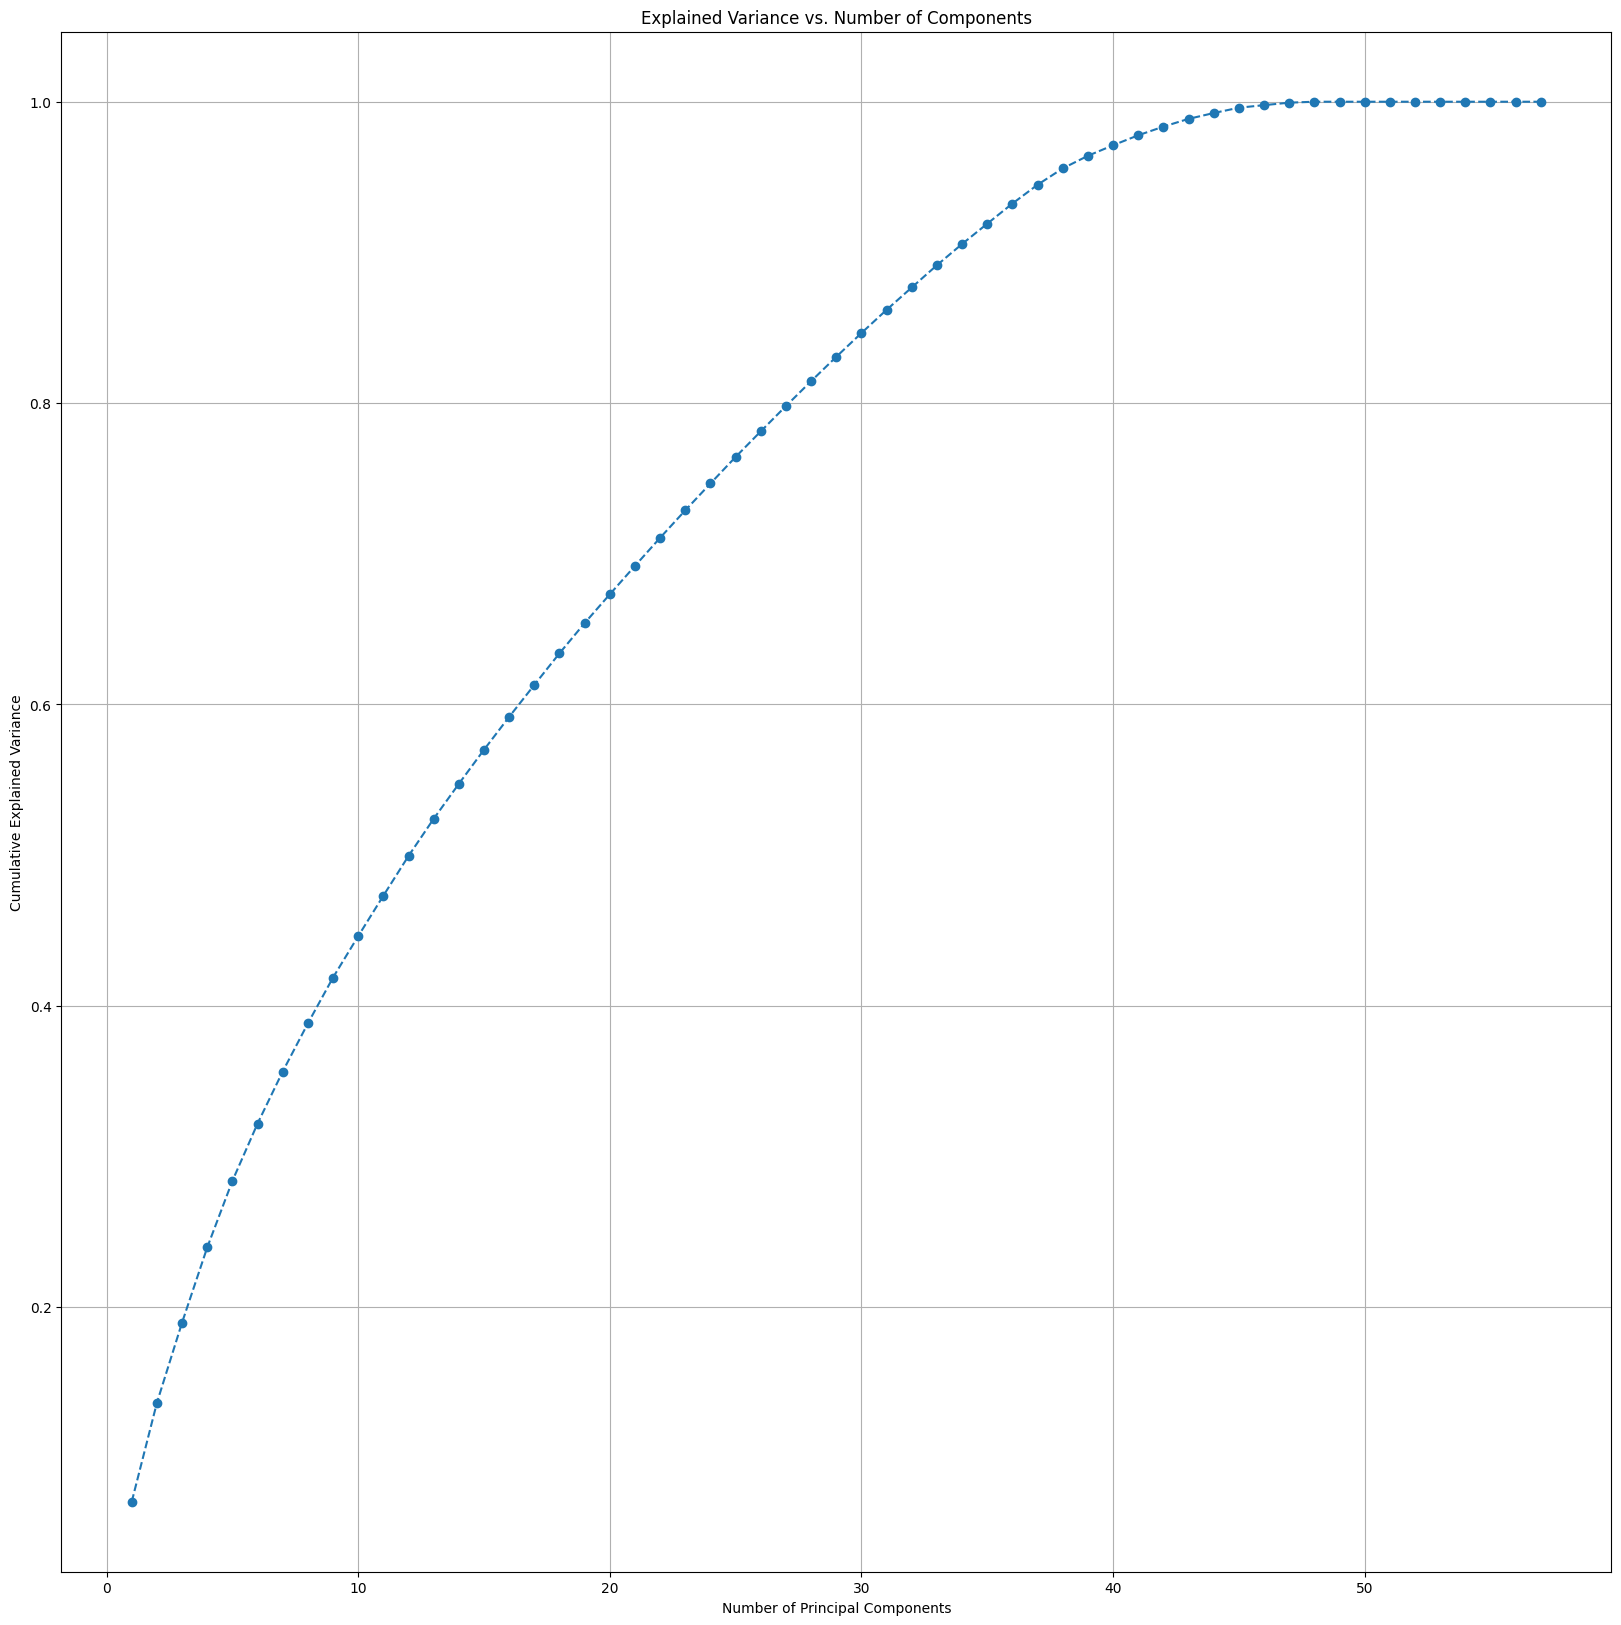

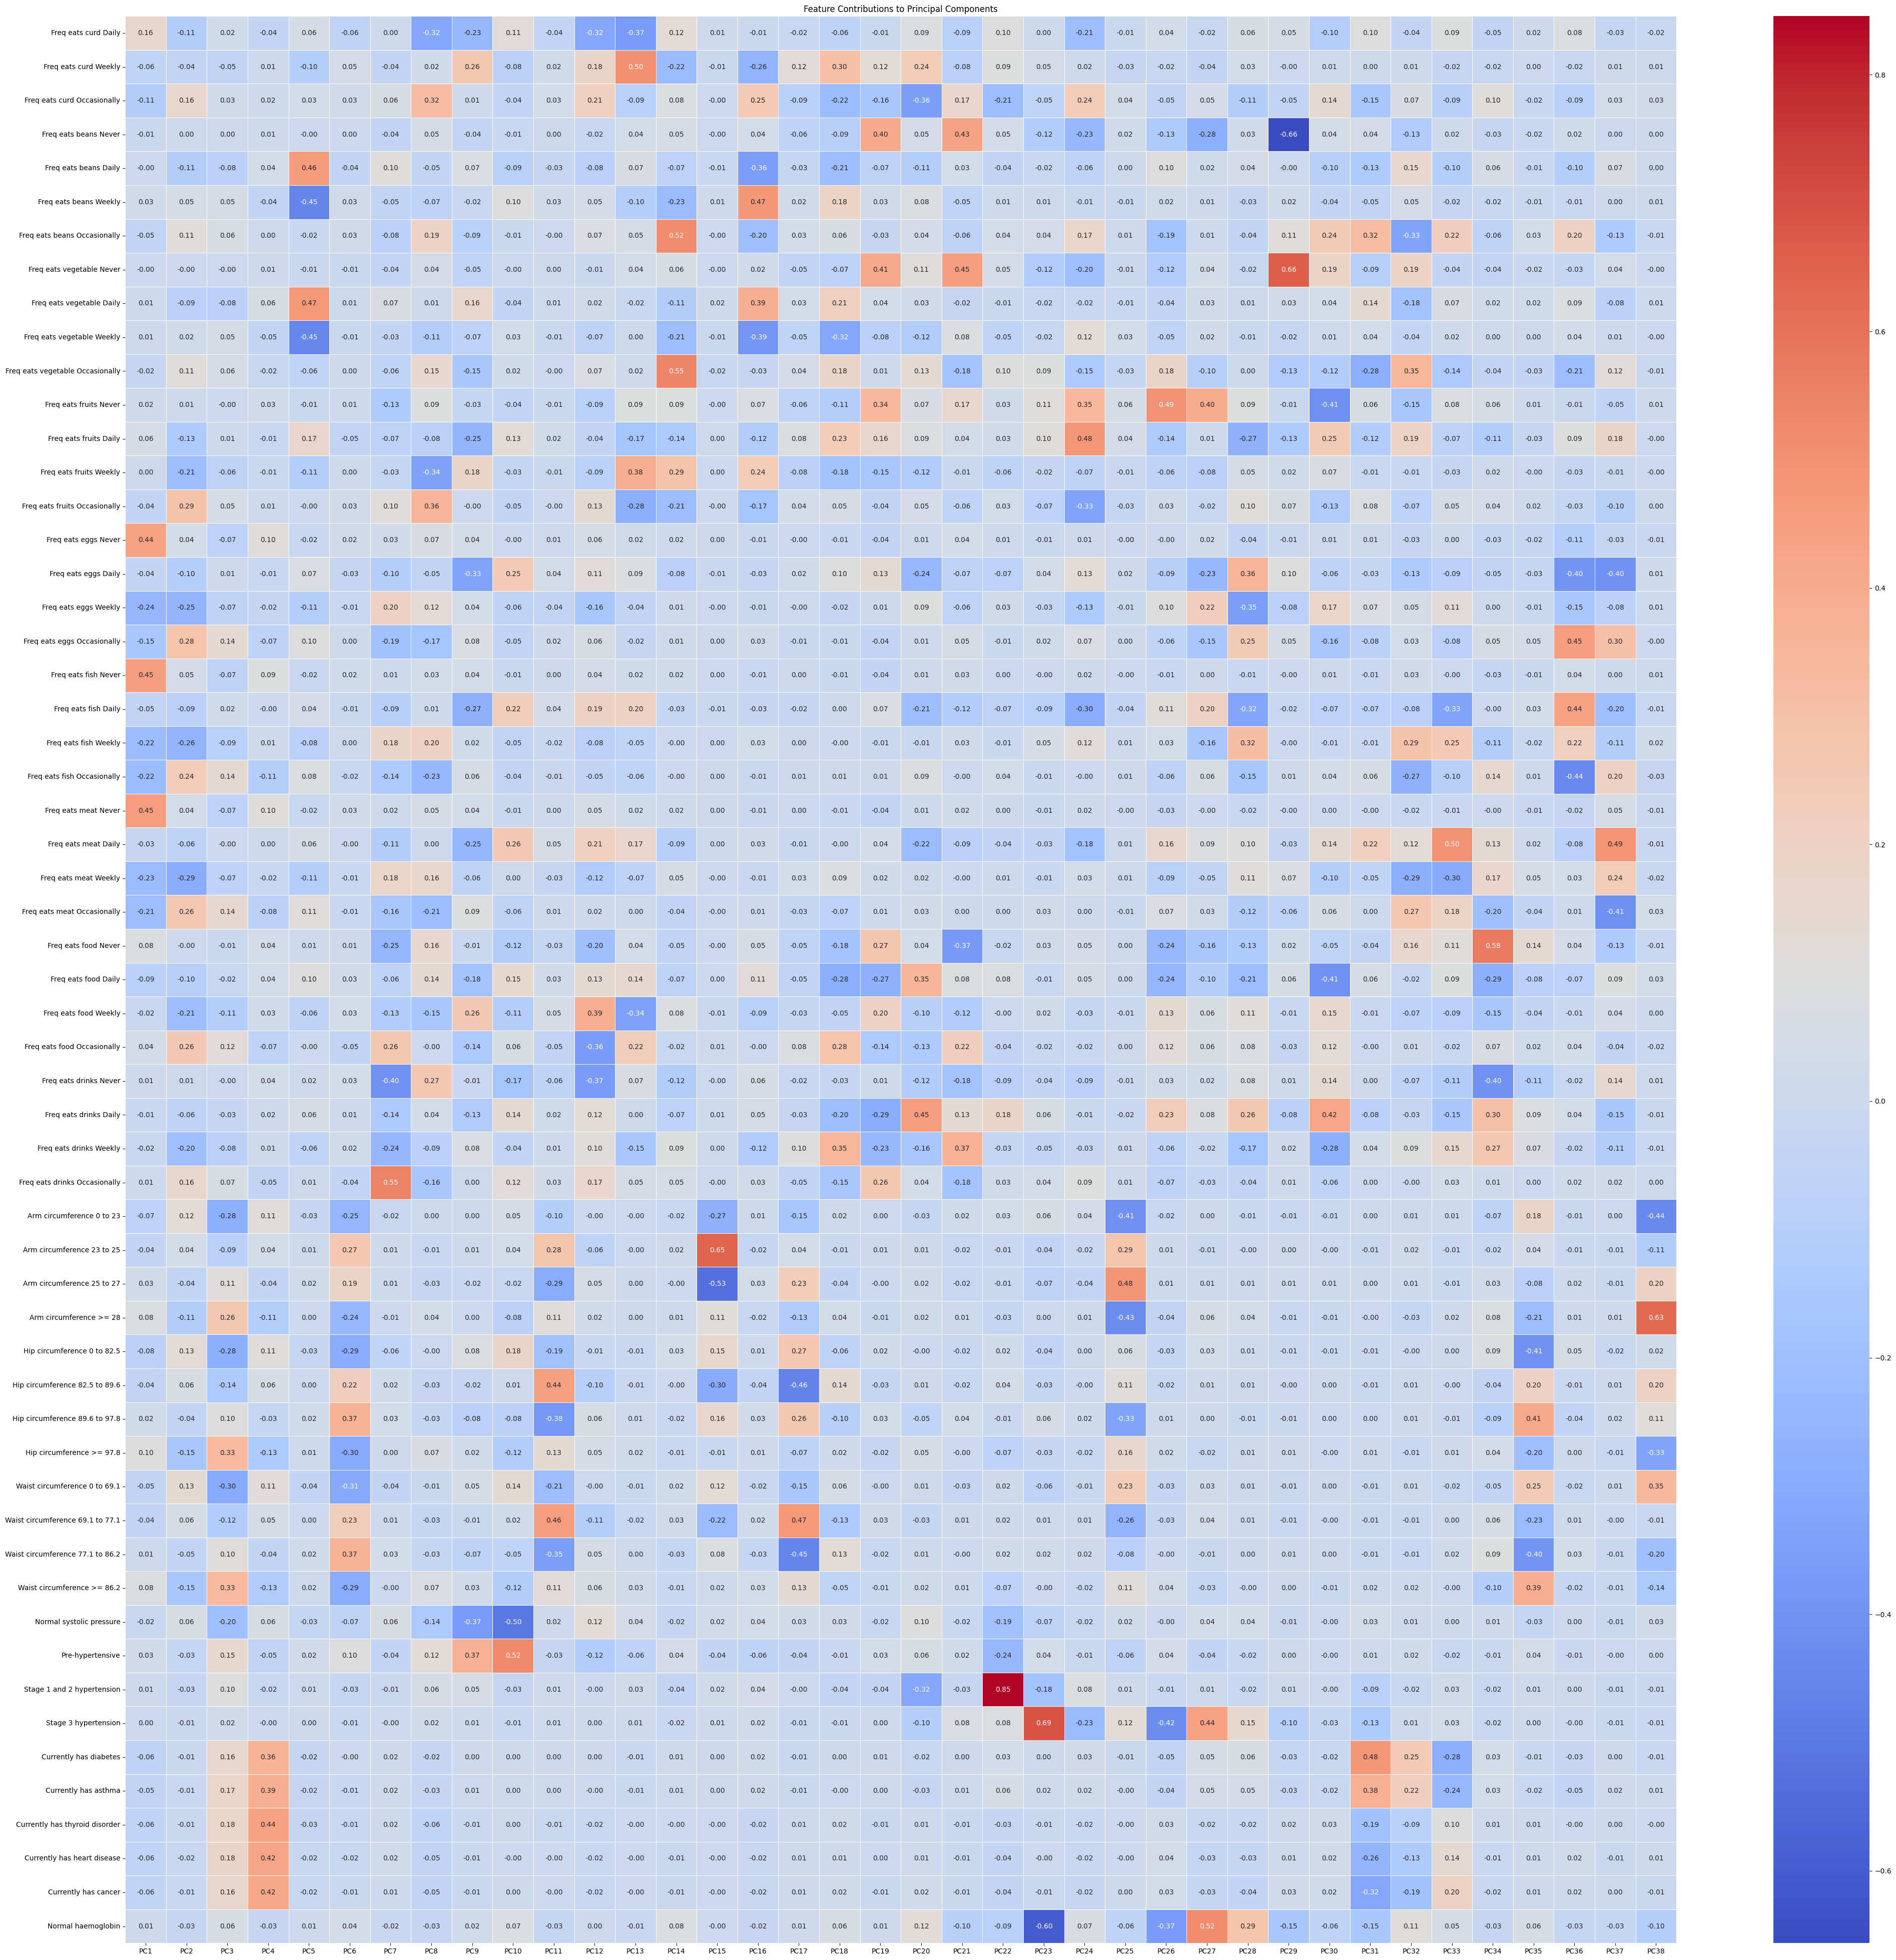

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = table
df_numeric = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

pca = PCA()
pca.fit(df_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(20, 20))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()

num_components = np.argmax(explained_variance >= 0.95) + 1

pca_opt = PCA(n_components=num_components)
df_pca = pca_opt.fit_transform(df_scaled)

loadings = pca_opt.components_.T  
feature_names = df_numeric.columns
pc_labels = [f"PC{i+1}" for i in range(num_components)]

loadings_df = pd.DataFrame(loadings, index=feature_names, columns=pc_labels)

plt.figure(figsize=(50, 50))
sns.heatmap(loadings_df, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Contributions to Principal Components")
plt.show()


In [34]:
cor_mat = table.corr(method = 'kendall')

In [35]:
cor_mat

,Freq eats curd Daily,Freq eats curd Weekly,Freq eats curd Occasionally,Freq eats beans Never,Freq eats beans Daily,Freq eats beans Weekly,Freq eats beans Occasionally,Freq eats vegetable Never,Freq eats vegetable Daily,Freq eats vegetable Weekly,...,Pre-hypertensive,Stage 1 and 2 hypertension,Stage 3 hypertension,Currently has diabetes,Currently has asthma,Currently has thyroid disorder,Currently has heart disease,Currently has cancer,High glucose,Normal haemoglobin
Freq eats curd Daily,1.000000,-0.515123,-0.512738,-0.026452,0.079976,-0.014038,-0.112639,-0.006178,0.011462,0.010569,...,-0.002387,-0.006482,-0.006273,-0.015893,-0.013236,-0.021908,0.004700,-0.023324,0.014730,0.029583
Freq eats curd Weekly,-0.515123,1.000000,-0.312503,-0.015541,-0.017485,0.032573,-0.023124,-0.006990,-0.031893,0.056858,...,0.011446,-0.000719,0.000706,-0.005559,-0.013035,-0.006042,-0.009653,0.000111,-0.005401,-0.002089
Freq eats curd Occasionally,-0.512738,-0.312503,1.000000,0.005216,-0.055916,-0.012535,0.121671,-0.003490,0.006407,-0.054742,...,-0.002204,0.005755,0.004197,0.010389,0.011699,0.013479,-0.003665,0.012709,-0.009226,-0.024147
Freq eats beans Never,-0.026452,-0.015541,0.005216,1.000000,-0.061016,-0.056115,-0.019406,0.086575,-0.013658,-0.005071,...,-0.006578,0.001047,0.000361,0.011491,0.014108,0.011954,0.012921,0.010959,0.001170,-0.003288
Freq eats beans Daily,0.079976,-0.017485,-0.055916,-0.061016,1.000000,-0.837302,-0.289556,-0.022279,0.359953,-0.279255,...,-0.011071,0.001793,-0.001244,-0.010533,-0.006251,-0.002692,0.000747,-0.006089,0.007236,-0.010279
Freq eats beans Weekly,-0.014038,0.032573,-0.012535,-0.056115,-0.837302,1.000000,-0.266301,-0.002362,-0.290583,0.289780,...,0.011768,-0.000767,-0.000338,-0.004701,-0.001671,-0.006600,-0.005398,-0.006186,-0.001618,-0.000636
Freq eats beans Occasionally,-0.112639,-0.023124,0.121671,-0.019406,-0.289556,-0.266301,1.000000,0.024417,-0.125411,-0.013911,...,0.000411,-0.002095,0.002756,0.024685,0.010985,0.013875,0.005326,0.019469,-0.010388,0.020363
Freq eats vegetable Never,-0.006178,-0.006990,-0.003490,0.086575,-0.022279,-0.002362,0.024417,1.000000,-0.055043,-0.039066,...,-0.008374,-0.003422,0.001879,-0.000323,0.002411,0.005373,0.003777,0.003405,0.000459,0.001536
Freq eats vegetable Daily,0.011462,-0.031893,0.006407,-0.013658,0.359953,-0.290583,-0.125411,-0.055043,1.000000,-0.824764,...,0.016339,0.004986,0.003339,0.003825,0.007437,-0.003703,-0.004875,0.009657,-0.003753,0.002641
Freq eats vegetable Weekly,0.010569,0.056858,-0.054742,-0.005071,-0.279255,0.289780,-0.013911,-0.039066,-0.824764,1.000000,...,-0.009233,-0.002212,-0.002610,-0.002108,-0.005100,-0.001763,0.003453,-0.008791,0.004335,-0.004873


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

def display_heatmap(df, cmap="coolwarm", figsize=(60, 60), annot=True):
    """
    Displays a heatmap of the given Pandas DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to visualize.
    cmap (str): Colormap for the heatmap (default: "coolwarm").
    figsize (tuple): Figure size (default: (10, 8)).
    annot (bool): Whether to annotate the heatmap with values (default: True).
    """
    plt.figure(figsize=figsize)
    sns.heatmap(df, cmap=cmap, annot=annot, fmt=".2f", linewidths=0.5)
    plt.title("Heatmap of DataFrame")
    plt.show()


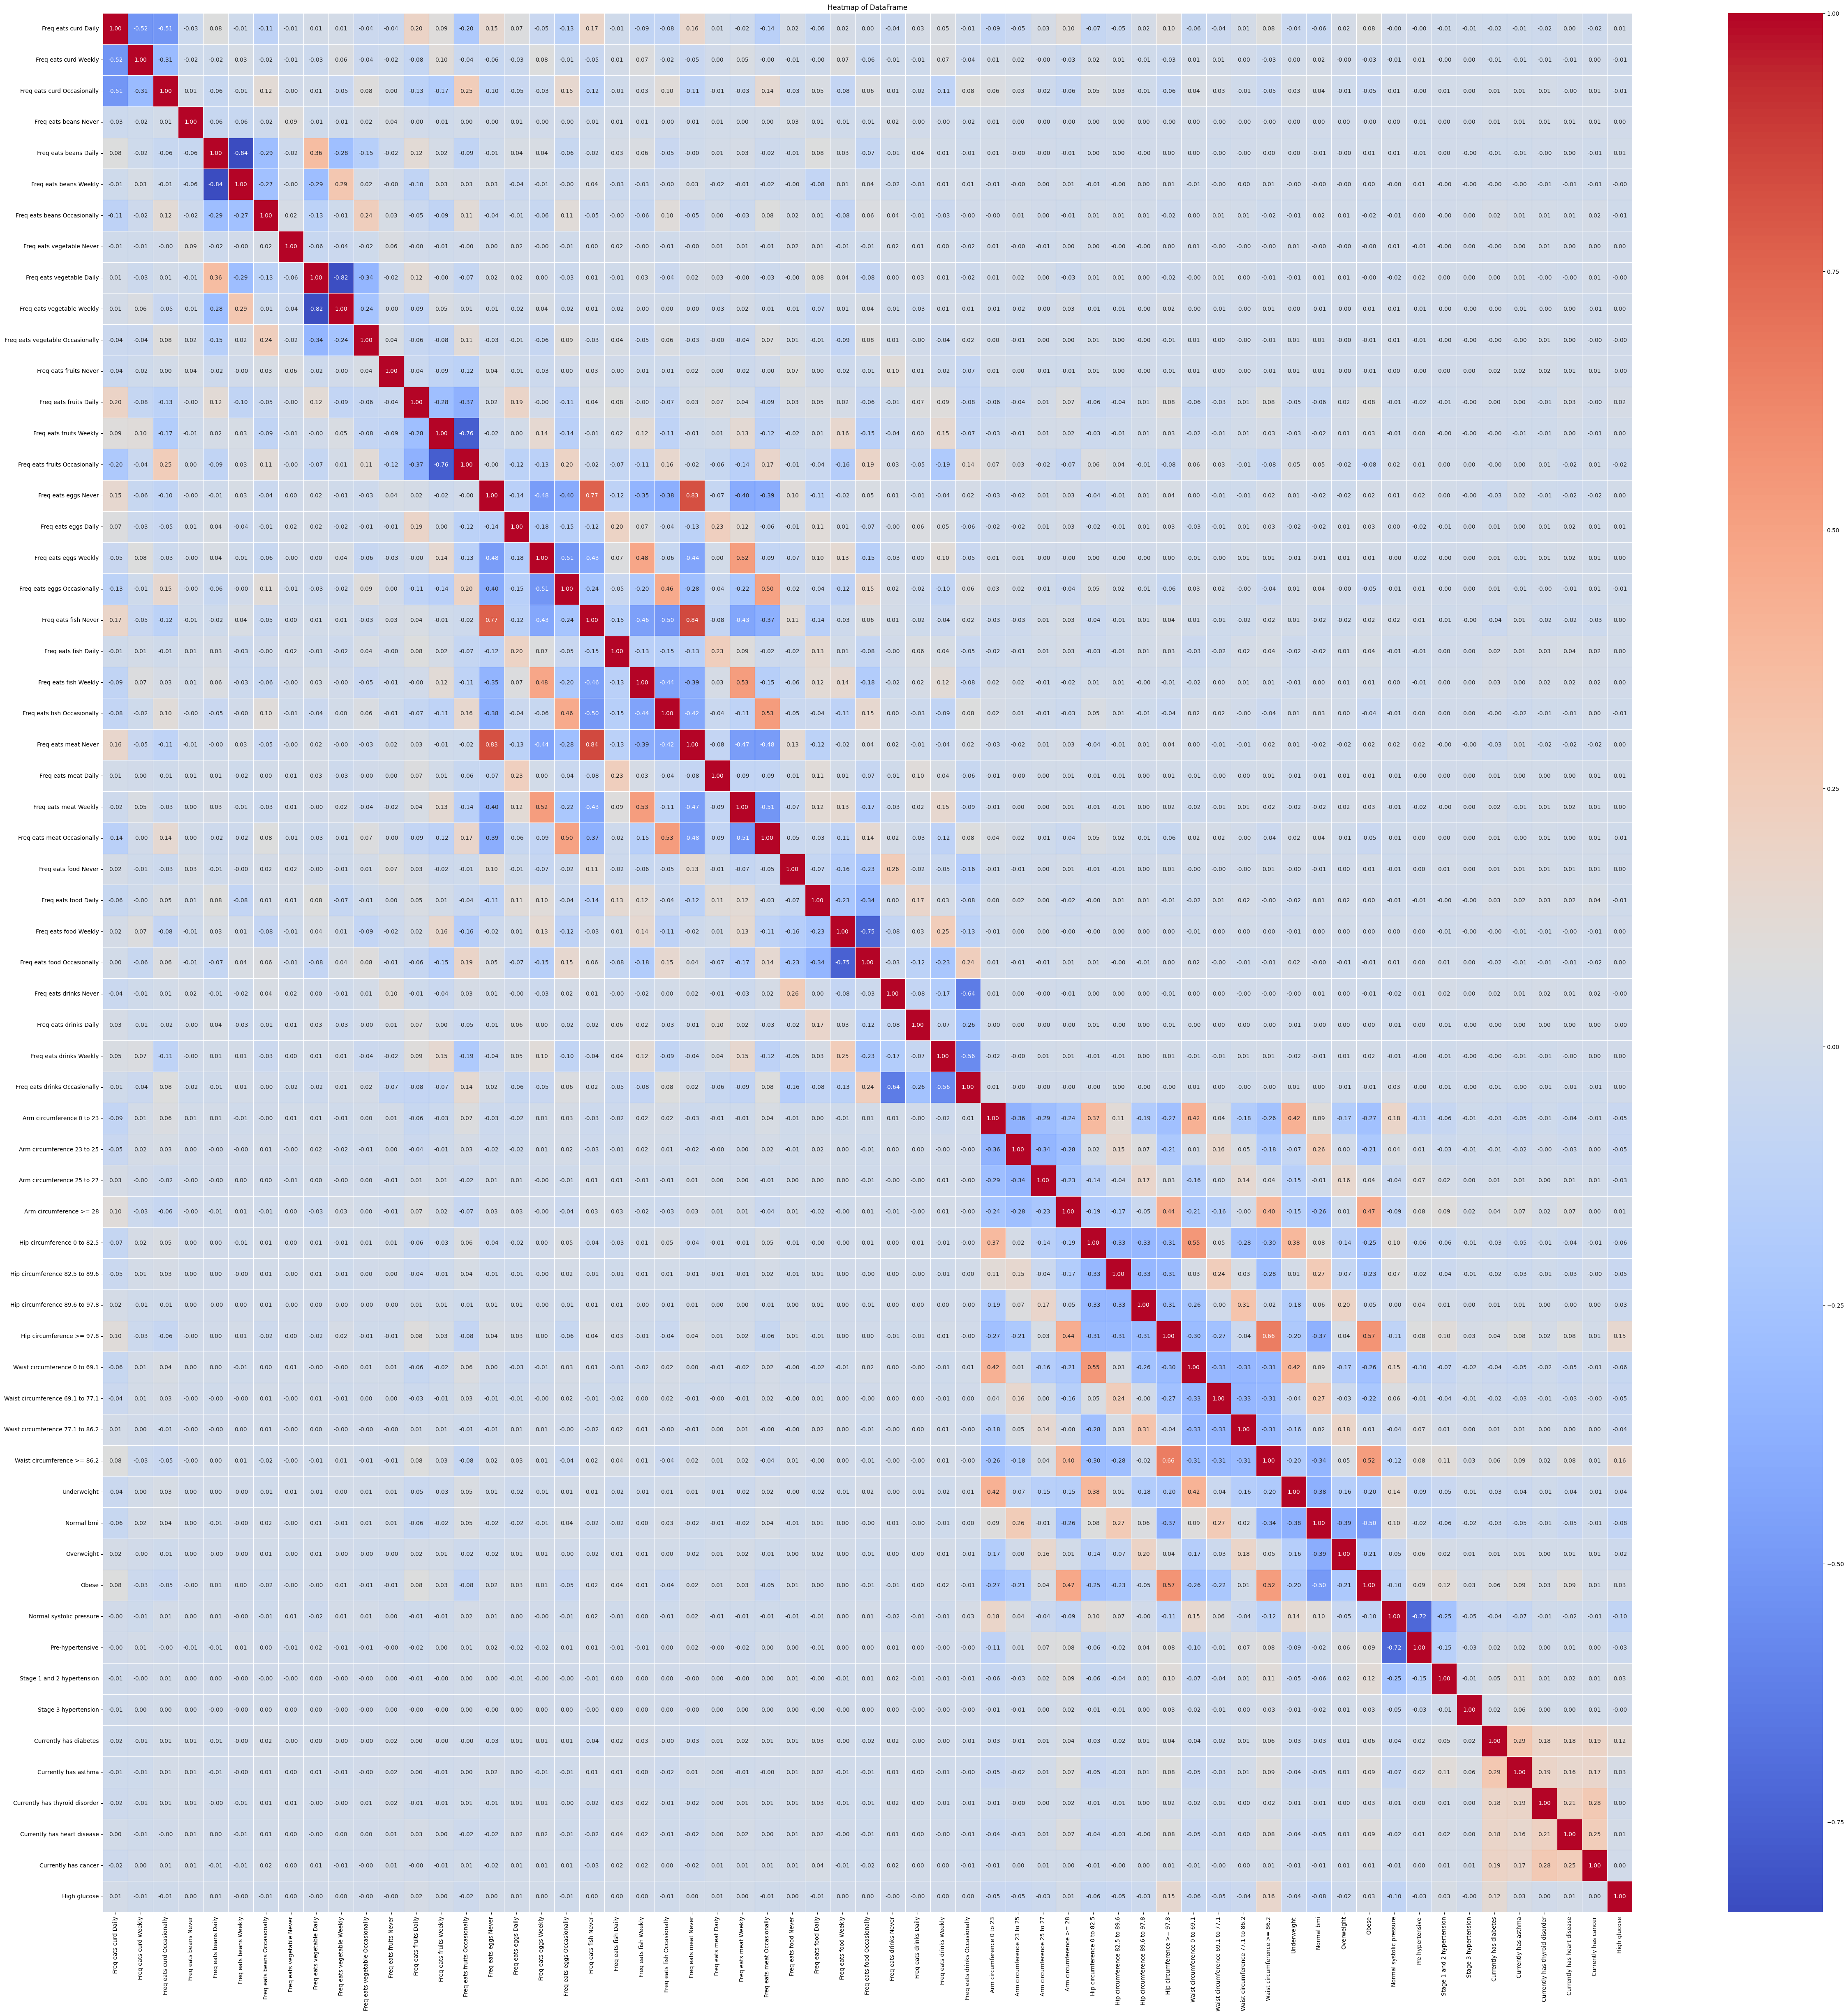

In [67]:
display_heatmap(cor_mat)